In [3]:
import pandas as pd
from unidecode import unidecode
import requests
from bs4 import BeautifulSoup
import numpy as np

In [202]:
data = pd.read_csv('aniversariantes.csv')

In [203]:
data.head()

,UF,CODIGO_MUNICIPIO,NOME_MUNICIPIO,DIA,MES
0,AM,130080,Borba,1,1
1,PA,150611,Quatipuru,1,1
2,PA,150796,Terra Alta,1,1
3,TO,170770,Filadélfia,1,1
4,TO,171370,Monte Santo do Tocantins,1,1


In [204]:
nomes_uf = data[['UF','NOME_MUNICIPIO']].copy()
nomes_uf
    

,UF,NOME_MUNICIPIO
0,AM,Borba
1,PA,Quatipuru
2,PA,Terra Alta
3,TO,Filadélfia
4,TO,Monte Santo do Tocantins
...,...,...
5565,SP,Altair
5566,SC,Fraiburgo
5567,SC,Lontras
5568,RS,Alegria


In [243]:
nomes_uf['UF'] = nomes_uf['UF'].apply(str.lower)
nomes_uf['NOME_MUNICIPIO'] = nomes_uf['NOME_MUNICIPIO'].apply(unidecode).apply(str.lower).str.replace(' ','')

In [244]:
nomes_uf['url'] = nomes_uf['NOME_MUNICIPIO'] + '.' + nomes_uf['UF'] + '.gov.br'

In [245]:
nomes_uf

,UF,NOME_MUNICIPIO,url
0,am,borba,borba.am.gov.br
1,pa,quatipuru,quatipuru.pa.gov.br
2,pa,terraalta,terraalta.pa.gov.br
3,to,filadelfia,filadelfia.to.gov.br
4,to,montesantodotocantins,montesantodotocantins.to.gov.br
...,...,...,...
5565,sp,altair,altair.sp.gov.br
5566,sc,fraiburgo,fraiburgo.sc.gov.br
5567,sc,lontras,lontras.sc.gov.br
5568,rs,alegria,alegria.rs.gov.br


In [16]:
count=0
for url in nomes_uf['url'].iloc[:10]:
    #url = url+'/secretarias'
    try:
        response = requests.get('https://'+url)
        if response.status_code == 200:
            # Obtém o conteúdo HTML da página
            #html_content = response.content
            count+=1
    except:
        pass
    

In [ ]:
response = requests.get('https://itapira.sp.gov.br')

html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')


## Por Secretaria

### Saúde

In [205]:
nomes_uf_sec = data[['UF','NOME_MUNICIPIO']].copy()
nomes_uf_sec['NOME_MUNICIPIO'] = nomes_uf_sec['NOME_MUNICIPIO'].str.replace(' ','')
nomes_uf_sec.head(2)

,UF,NOME_MUNICIPIO
0,AM,Borba
1,PA,Quatipuru


In [206]:
i = 0
nomes_uf_sec['sec_saude_url'] = np.nan
for estado, municipio in zip(nomes_uf_sec['UF'],nomes_uf_sec['NOME_MUNICIPIO']):
    nomes_uf_sec['sec_saude_url'].iloc[i] = f"https://portal.conasems.org.br/rede-cosems/dados?fq%5Buf%5D={estado}&municipio={municipio}"
    i+=1

/tmp/ipykernel_8174/2343533883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nomes_uf_sec['sec_saude_url'].iloc[i] = f"https://portal.conasems.org.br/rede-cosems/dados?fq%5Buf%5D={estado}&municipio={municipio}"
/tmp/ipykernel_8174/2343533883.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'https://portal.conasems.org.br/rede-cosems/dados?fq%5Buf%5D=AM&municipio=Borba' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nomes_uf_sec['sec_saude_url'].iloc[i] = f"https://portal.conasems.org.br/rede-cosems/dados?fq%5Buf%5D={estado}&municipio={municipio}"


In [207]:
nomes_uf_sec['sec_saude_url'][0]

'https://portal.conasems.org.br/rede-cosems/dados?fq%5Buf%5D=AM&municipio=Borba'

In [172]:
nomes_uf_sec

,UF,NOME_MUNICIPIO,sec_saude_url
0,AM,Borba,https://portal.conasems.org.br/rede-cosems/dad...
1,PA,Quatipuru,https://portal.conasems.org.br/rede-cosems/dad...
2,PA,TerraAlta,https://portal.conasems.org.br/rede-cosems/dad...
3,TO,Filadélfia,https://portal.conasems.org.br/rede-cosems/dad...
4,TO,MonteSantodoTocantins,https://portal.conasems.org.br/rede-cosems/dad...
...,...,...,...
5565,SP,Altair,https://portal.conasems.org.br/rede-cosems/dad...
5566,SC,Fraiburgo,https://portal.conasems.org.br/rede-cosems/dad...
5567,SC,Lontras,https://portal.conasems.org.br/rede-cosems/dad...
5568,RS,Alegria,https://portal.conasems.org.br/rede-cosems/dad...


In [215]:
from bs4 import BeautifulSoup
import time
from selenium import webdriver
import re
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

 
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

padrao = re.compile(r'Secretário\(a\) Municipal(.*?)Sede', re.DOTALL)

nomes_uf_sec['saude'] = np.nan
nomes_uf_sec['funcao'] = np.nan

for index, url in enumerate(nomes_uf_sec['sec_saude_url']):
    try:
        driver.get(url)
        #time.sleep(1)
        wait = WebDriverWait(driver, 10)
    
        elemento = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'mb-12')))
    
        
        html_content = driver.page_source
        
        soup = BeautifulSoup(html_content, 'html.parser')
        
        correspondencias = padrao.search(soup.get_text())
        nomes_uf_sec['nome'].iloc[index] = correspondencias[0].replace('Secretário(a) Municipal','').replace('Sede','')
        nomes_uf_sec['funcao'].iloc[index] = 'saude'
    except:
        pass
driver.quit()

/tmp/ipykernel_8174/715985503.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nomes_uf_sec['saude'].iloc[index] = correspondencias[0].replace('Secretário(a) Municipal','').replace('Sede','')
/tmp/ipykernel_8174/715985503.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ALBERT ANTUNES DE SOUZA CAMPOS ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nomes_uf_sec['saude'].iloc[index] = correspondencias[0].replace('Secretário(a) Municipal','').replace('Sede','')


In [227]:
nomes_uf_sec.to_csv('deu_certo.csv')

In [228]:
nomes_uf_sec

,UF,NOME_MUNICIPIO,sec_saude_url,saude,funcao
0,AM,Borba,https://portal.conasems.org.br/rede-cosems/dad...,ALBERT ANTUNES DE SOUZA CAMPOS,saude
1,PA,Quatipuru,https://portal.conasems.org.br/rede-cosems/dad...,Joaquim Luciano da Silva Reis,saude
2,PA,TerraAlta,https://portal.conasems.org.br/rede-cosems/dad...,Arivaldo Vidal Aguiar,saude
3,TO,Filadélfia,https://portal.conasems.org.br/rede-cosems/dad...,ARYANNA MARINHO MEDEIROS BENTO,saude
4,TO,MonteSantodoTocantins,https://portal.conasems.org.br/rede-cosems/dad...,PABLO MARTINS DOS SANTOS,saude
...,...,...,...,...,...
5565,SP,Altair,https://portal.conasems.org.br/rede-cosems/dad...,Letícia Andrade dos Santos,saude
5566,SC,Fraiburgo,https://portal.conasems.org.br/rede-cosems/dad...,EDSON LUIZ MEDEIROS,saude
5567,SC,Lontras,https://portal.conasems.org.br/rede-cosems/dad...,DANIELA ARNDT,saude
5568,RS,Alegria,https://portal.conasems.org.br/rede-cosems/dad...,Teresinha Marczewski Zavaski,saude


## Scrap

### /secretarias/x

In [ ]:
secretarias = ['administracao', 'obras', 'obras-publicas', 'educacao', 'habitacao', 'financas', 'fazenda', 'gestao-de-pessoas',
               'gestao-estrategica' ,'turismo', 'esporte-e-lazer', 'justica']

### /secretarias e NLP

In [214]:
import requests
import spacy

nlp = spacy.load("pt_core_news_sm")

url = 'https://www.bacabal.ma.gov.br/secretarias'
response = requests.get(url)
html_content = response.text

# Use o spaCy para processar o texto da página
doc = nlp(html_content)

# Itere sobre as entidades nomeadas encontradas
for entidade in doc.ents:
    print(f"Tipo: {entidade.label_}, Texto: {entidade.text}")

Texto: HTML
Texto: BEGIN
Texto: html
Texto: Prefeitura Municipal de Bacabal</title
Texto: Meta Tags
Texto: Content-Type
Texto: content="text
Texto: html
Texto: UTF-8
Texto: http-equiv="X-UA-Compatible
Texto: name="viewport
Texto: Transparencia
Texto: Prefeitura Municipal
Texto: itemprop="description
Texto: Transparência
Texto: Prefeitura Municipal de Bacabal
Texto: Agencia Plus"/
Texto: itemprop="image
Texto: images
Texto: content="https://www.bacabal.ma.gov.br/secretarias"/
Texto: content="article"/
Texto: content="Portal da
Texto: Transparencia
Texto: Prefeitura Municipal
Texto: content="Portal da
Texto: Transparência
Texto: Prefeitura Municipal de Bacabal
Texto: Agencia Plus"/
Texto: images
Texto: property="article
Texto: content="https://www.facebook.com/
Texto: BacabalMaranhao
Texto: property="article
Texto: content="https://www.facebook.com/
Texto: BacabalMaranhao
Texto: property="twitter
Texto: content="summary_large_image"/
Texto: property="twitter
Texto: content="@djhost
Texto

## Juntando os dois Outputs Finais

In [62]:
nomes_uf_sec = pd.read_csv('deu_certo.csv').drop('Unnamed: 0', axis=1).drop('sec_saude_url', axis=1)
nomes_uf_sec = nomes_uf_sec.rename(columns={"saude": "Nome"})
nomes_uf_sec = nomes_uf_sec.rename(columns={"funcao": "Funcao"})
nomes_uf_sec = nomes_uf_sec.rename(columns={"NOME_MUNICIPIO": "Cidade"})
nomes_uf_sec['Funcao'] = 'Secretário(a) de Saúde'
nomes_uf_sec.head()

,UF,Cidade,Nome,Funcao
0,AM,Borba,ALBERT ANTUNES DE SOUZA CAMPOS,Secretário(a) de Saúde
1,PA,Quatipuru,Joaquim Luciano da Silva Reis,Secretário(a) de Saúde
2,PA,TerraAlta,Arivaldo Vidal Aguiar,Secretário(a) de Saúde
3,TO,Filadélfia,ARYANNA MARINHO MEDEIROS BENTO,Secretário(a) de Saúde
4,TO,MonteSantodoTocantins,PABLO MARTINS DOS SANTOS,Secretário(a) de Saúde


In [54]:
adicionar = pd.read_csv('output.csv')
adicionar

,Nome,Funcao,Cidade,UF
0,Aberson Carvalho,Secretário(a) de Educação,Rio Branco,AC
1,Roseane Vasconcelos,Secretário(a) de Educação,Maceió,AL
2,Kuka Chaves,Secretário(a) de Educação,Manaus,AM
3,Sandra Casimiro,Secretário(a) de Educação,Macapá,AP
4,Adélia Pinheiro,Secretário(a) de Educação,Salvador,BA
...,...,...,...,...
77,Jose Maria Ferreira Pontes Neto,Secretaria Municipal De Infraestrutura,Juazeiro do Norte,CE
78,Genilda Ribeiro Oliveira,Secretaria Municipal De Meio Ambiente E Serviç...,Juazeiro do Norte,CE
79,Francimones Rolim De Albuquerque,Secretaria Municipal De Saúde,Juazeiro do Norte,CE
80,Claudio Sergei Luz E Silva,Secretaria Municipal De Segurança Pública E Ci...,Juazeiro do Norte,CE


In [90]:
dados_finais = pd.concat([nomes_uf_sec, adicionar])
dados_finais.shape
dados_finais.to_csv('final.csv')

In [101]:
from namsorclient import NamsorClient

api_key = '3263c2fae0f9c551d028bfcc4f7e1bd6'
client = NamsorClient(api_key=api_key)

def validar_nome(nome):
    try:
        resposta = client.gender({'name':nome})
        genero = resposta['scale']
        return genero
    except:
        return 'unknown'
    
    

print(validar_nome('Paul'))

unknown


In [103]:
dados_finais.head(10)

,UF,Cidade,Nome,Funcao
0,AM,Borba,ALBERT ANTUNES DE SOUZA CAMPOS,Secretário(a) de Saúde
1,PA,Quatipuru,Joaquim Luciano da Silva Reis,Secretário(a) de Saúde
2,PA,TerraAlta,Arivaldo Vidal Aguiar,Secretário(a) de Saúde
3,TO,Filadélfia,ARYANNA MARINHO MEDEIROS BENTO,Secretário(a) de Saúde
4,TO,MonteSantodoTocantins,PABLO MARTINS DOS SANTOS,Secretário(a) de Saúde
5,TO,Tupiratins,MARIA LÚCIA DUARTE CAMELO,Secretário(a) de Saúde
6,MA,CachoeiraGrande,IVANILSON ALVES PEREIRA,Secretário(a) de Saúde
7,MA,DuqueBacelar,Ana Leonor Batista Burlamaqui,Secretário(a) de Saúde
8,MA,LagodaPedra,ALMIRALICE MENDES PEREIRA,Secretário(a) de Saúde
9,PI,Acauã,JOAQUIM CICERO RODRIGUES,Secretário(a) de Saúde


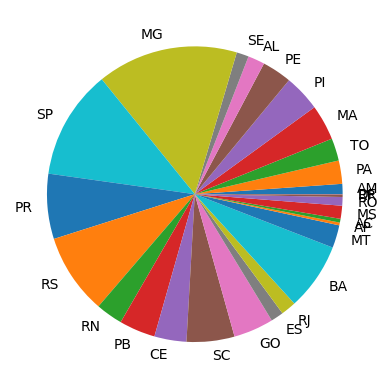

In [99]:
import matplotlib.pyplot as plt
from collections import Counter

estados = dados_finais['UF'].to_list()

contagem_estados = Counter(contagem_estados)

plt.figure()

rotulos = list(contagem_estados.keys())
dados = list(contagem_estados.values())

plt.pie(dados, labels=rotulos)
plt.show()

In [46]:
import requests
from bs4 import BeautifulSoup

url = 'https://pmt.pi.gov.br/secretarios/'

response = requests.get(url, verify=False)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    names = soup.find_all('h3', class_='member-name')
    roles = soup.find_all('h4', class_='member-role')

    for name, role in zip(names, roles):
        print(f"Nome: {name.text} Função: {role.text}")
        print(type(str(role.text)))
        print(str(role.text))
        new_row = {'UF': 'PI', 'NOME_MUNICIPIO': 'Teresina', 'Nome': (str(name.txt.str)), 'funcao': (str(role.txt.str))}
        new_row = pd.DataFrame(new_row, index=[0])
        nomes_uf_sec = pd.concat([nomes_uf_sec, new_row])
                                                  
    
else:
    print(f"A solicitação falhou com código de status: {response.status_code}")


/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pmt.pi.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Nome: José Pessoa Leal Função: Prefeito de Teresina
<class 'str'>
Prefeito de Teresina
Nome: Robert Rios Magalhães Função: Vice-prefeito de Teresina
<class 'str'>
Vice-prefeito de Teresina
Nome: Ari Ricardo da Rocha Gomes Ferreira Função: FUNDAÇÃO MUNICIPAL DE SAÚDE
<class 'str'>
FUNDAÇÃO MUNICIPAL DE SAÚDE
Nome: Ronney Wellington Marques Lustosa Função: Secretaria Municipal de Administração
<class 'str'>
Secretaria Municipal de Administração
Nome: Esdras Avelino Leitão Júnior Função: SECRETARIA MUNICIPAL DE FINANÇAS
<class 'str'>
SECRETARIA MUNICIPAL DE FINANÇAS
Nome: Nouga Cardoso Batista Função: SECRETARIA MUNICIPAL DE EDUCAÇÃO
<class 'str'>
SECRETARIA MUNICIPAL DE EDUCAÇÃO
Nome: João Henrique de Almeida Sousa Função: SECRETÁRIO MUNICIPAL DE PLANEJAMENTO
<class 'str'>
SECRETÁRIO MUNICIPAL DE PLANEJAMENTO
Nome: Manoel Bezerra da Silva Neto Função: PRESIDENTE DA FUNDAÇÃO MUNICIPAL DE CULTURA MONSENHOR CHAVES
<class 'str'>
PRESIDENTE DA FUNDAÇÃO MUNICIPAL DE CULTURA MONSENHOR CHAVES
No

In [ ]:
import requests
from bs4 import BeautifulSoup

# Faz a requisição HTTP para a página web
for url in nomes_uf['url']:
    try
    response = requests.get('https://'+url+'/secretarias', verify=False)
    html_content = response.content
    
    # Parseia o HTML com BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

In [ ]:
nomes_uf_sec

In [254]:
import requests
from bs4 import BeautifulSoup

url = 'campinas.sp.gov.br'
response = requests.get('https://'+str(url))
html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

links_secretaria = [link['href'] for link in soup.find_all('a', href=True) if 'secretaria' in link['href'].lower()]
for link in links_secretaria:
    print(link)

In [ ]:
import requests
from bs4 import BeautifulSoup

for url in nomes_uf['url']:
    # Faça uma solicitação para obter o conteúdo da página da web
    try:
        response = requests.get('https://'+url)
    except:
        pass
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
    
        tags_ancora = soup.find_all('a')
    
        for tag_ancora in tags_ancora:
            link = tag_ancora.get('href')
            if link:
                if 'secretaria' in link:
                    print(link)
    else:
        print(f"A solicitação falhou com código de status: {response.status_code}")


http://www.prefeitura.sp.gov.br/cidade/secretarias/fazenda/
https://www.prefeitura.sp.gov.br/cidade/secretarias/controladoria_geral/transparencia_covid19/
https://www.prefeitura.sp.gov.br/cidade/secretarias/controladoria_geral/transparencia_covid19/
https://www.prefeitura.sp.gov.br/cidade/secretarias/governo/acesso_a_informacao/index.php?p=299244
https://www.prefeitura.sp.gov.br/cidade/secretarias/governo/acesso_a_informacao/index.php?p=299244
https://www.prefeitura.sp.gov.br/cidade/secretarias/saude/vigilancia_em_saude/doencas_e_agravos/coronavirus/index.php?p=295099
https://www.prefeitura.sp.gov.br/cidade/secretarias/saude/vigilancia_em_saude/doencas_e_agravos/coronavirus/index.php?p=295099
http://www.prefeitura.sp.gov.br/cidade/secretarias/fazenda/servicos/iptu/
http://www.prefeitura.sp.gov.br/cidade/secretarias/inovacao/inclusao_digital/telecentros/index.php
http://www.prefeitura.sp.gov.br/cidade/secretarias/fazenda/servicos/ccm/index.php
http://www.prefeitura.sp.gov.br/cidade/secr

In [248]:
nomes_uf

,UF,NOME_MUNICIPIO,url
0,am,borba,borba.am.gov.br
1,pa,quatipuru,quatipuru.pa.gov.br
2,pa,terraalta,terraalta.pa.gov.br
3,to,filadelfia,filadelfia.to.gov.br
4,to,montesantodotocantins,montesantodotocantins.to.gov.br
...,...,...,...
5565,sp,altair,altair.sp.gov.br
5566,sc,fraiburgo,fraiburgo.sc.gov.br
5567,sc,lontras,lontras.sc.gov.br
5568,rs,alegria,alegria.rs.gov.br
